In [1]:
import sys
sys.path.append('../../src/utils/')

from almaDatabaseQuery import *

import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

In [2]:
q = databaseQuery()

### Select some candidate of Non-ALMACAL object which has full Polarization obs
- no requirement for min Time per Band (different with non-almacal, there are maybe some objects that are not in non-almacal sample)
- exclude Cylce0
- no minimum freq res
- select Pol: True

In [3]:
report, resume = q.select_object_from_sqldb("calibrators_brighterthan_0.1Jy_20180419.db", \
                                    maxFreqRes=999999999, array='12m', \
                                    excludeCycle0=True, \
                                    selectPol=True, \
                                    minTimeBand={3:0., 6:0., 7:0.}, \
                                    nonALMACAL = True, \
                                    silent=True)

Number of accepted source:  57


### Sorted based on total integration in 3 Band (3+6+7)

In [6]:
resume_sorted = sorted(resume, key=lambda data: data[11]+data[12]+data[13])

In [7]:
res = np.array(resume_sorted)

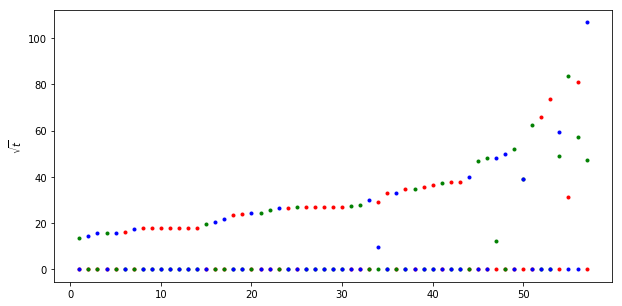

In [8]:
plt.figure(figsize=(10,5))
num = 57
plt.plot(np.linspace(1,num,num), np.sqrt(res[:,11].astype(float)), 'r.', np.linspace(1,num,num), np.sqrt(res[:,12].astype(float)), 'g.', np.linspace(1,num,num), np.sqrt(res[:,13].astype(float)), 'b.')
plt.ylabel(r"$\sqrt{t}$")


- The correlation is seen on all plot, however the last plot has better variance (I think).
- we can used this as basis of 'cutting'.
- I make a cutting line in black and magenta (for 20 and 30 sample) which has largest total integration time.

In [9]:
print("List of primary sample: ")
print(res[:,0])

List of primary sample: 
['J1713-3418' 'J0541-0211' 'J1633-2557' 'J1636-4102' 'J0440+2728'
 'J0628-6248' 'J1824+0119' 'J0516-6207' 'J0522-6107' 'J0534-6106'
 'J0620-6107' 'J0610-6058' 'J0506-6109' 'J0623-6436' 'J0731-2341'
 'J0730-1141' 'J1604-4441' 'J1304-0346' 'J1217+3007' 'J0501-0159'
 'J1851+0035' 'J1706-4600' 'J0552+0313' 'J0607-6031' 'J1832+0731'
 'J0516-7237' 'J0700-6610' 'J0644-6712' 'J0332-7249' 'J0744-6919'
 'J1224+0330' 'J1922+1530' 'J1838+0404' 'J0431+1731' 'J1331+3030'
 'J1742-1517' 'J2134-0153' 'J0139+1753' 'J2225-0457' 'J0457-2324'
 'J1717-3342' 'J0440-6952' 'J0715-6829' 'J0541-0541' 'J1911-2006'
 'J0747-3310' 'J0750+1231' 'J1321-4342' 'J1733-3722' 'J0237+2848'
 'J1912-0804' 'J1225+1253' 'J1221+2813' 'J0336+3218' 'J1743-0350'
 'J1256-0547' 'J1751+0939']


See the detail of each object in `report_8_pol.txt` + `report_8_nonAlmacal.txt`

J1751+0939 can be the first candidate which is in non-almacal sample and also pol sample.